# Introductory remarks
This [Google Colaboratory](https://colab.research.google.com) notebook is designed to demonstrate all the Python programming tools you'll need for the MATH327 computer project.

If you're completely new to [Python](https://www.python.org), or programming in general, the [official "getting started" information](https://wiki.python.org/moin/BeginnersGuide) is great.  It provides tutorials both for those who have never programmed before as well as for those with previous programming experience.  That said, all necessary information should appear here, so checking out those additional tutorials is entirely optional.  We are using Python in part because it is very easy to work with compared to some other programming frameworks.  It is also free and extremely widely used, making it a very valuable skill to encounter in the course of your studies.  We are also going to keep things simple---only a few dozen lines of code will be required for the project.  (A *line of code* is essentially an instruction telling the program what we want it to do.)

The notebook model for running and sharing code is very popular, as it allows us to mix formatted explanations (like these) with program execution and graphics.  Colaboratory notebooks specifically can run code on a machine sitting in the [Google Cloud](https://cloud.google.com),  all for free.  If you want to save and edit a copy of this notebook, you can either set that up in a Google account, or grab the notebook from the [GitHub repository](https://github.com/daschaich/MATH327_2021/tree/master/computer_project) for the module and run it in a notebook software system of your choice, such as [Project Jupyter](https://jupyter.org).

# The demo itself
Let's start by loading some convenient packages.  We will need the built-in `math` package to have a square-root (`math.sqrt`) function.  We will need the built-in `random` package to work with the pseudo-random numbers discussed in the assignment.

We will also load two add-on libraries: [NumPy](https://numpy.org) to simplify numerical computing in Python, and [Matplotlib](https://matplotlib.org) to simplify plotting.  While we're getting everything set up, let's check the versions of Python, NumPy and Matplotlib.  This code last ran successfully with Python version 3.6.9, NumPy version 1.19.5 and Matplotlib version 3.2.2, but it's simple enough that other versions should also work.  Just make sure you're using Python 3.  (Python 2 is still widespread, but no longer supported.)

In [ ]:
import math
import random
import numpy as np
import matplotlib as mpl

from platform import python_version
print(python_version())
print(np.__version__)
print(mpl.__version__)

3.6.9
1.19.5
3.2.2


The first exercise we will do is to generate 100,000 pseudo-random numbers distributed according to $p(x) = \frac{x}{2}$ (for $0 \leq x \leq 2$ so that $\int p(x) dx = 1$).

First we give our pseudo-random number generator an explicit "seed" (in this case `42`) so that our work is easily reproducible.  Each call of the `random.random()` function then generates a pseudo-random number $u$ from a uniform distribution, $p(u) = 1$ (for $0 \leq u \leq 1$ so that $\int p(u) du = 1$ as well).  As discussed in the assignment, inverse transform sampling allows us to consider $x = F(u) = 2\sqrt{u}$ with the desired $p(x)$.

We then create an array, `dat`, that contains all 100,000 samples $x$, while also accumulating **running sums** that efficientlly provide the mean $\mu = \langle x\rangle$ and standard deviation $\sigma = \sqrt{\langle x^2\rangle - \langle x\rangle^2}$.  We initialize the array to be empty (`[]`), and then append each sample to its end.  The notation `[-1]` picks out the last entry in the array---the one that we just appended.

The "[for loop](https://en.wikipedia.org/wiki/For_loop)" used below is a key programming concept.  In Python such loops begin with a colon (`:`) and last so long as the following lines are indented.  (Unlike most other programming frameworks, in Python [whitespace matters](https://xkcd.com/353/).)  Every instruction in the loop is repeated `nSamples` times, once for each value of `i`$ = 0$, $1$, $\cdots$, `nSamples`$ - 1$.  (In this particular loop the value of `i` is not relevant.)

In this example it's easy to analytically compute $\mu = \frac{4}{3}$ and $\sigma = \frac{\sqrt{2}}{3}$, which 100,000 samples allow us to numerically reproduce to much better than 1% precision.

In [ ]:
random.seed(42)
nSamples = 100000
dat = []
vev = 0.0
vevSq = 0.0
for i in range(0, nSamples):
  dat.append(2.0 * math.sqrt(random.random()))
  vev += dat[-1]
  vevSq += dat[-1] * dat[-1]

vev /= nSamples
vevSq /= nSamples
print("mu =", vev)
print("sigma =", math.sqrt(vevSq - vev*vev))

mu = 1.333352094142587
sigma = 0.4719633052586884


If all we wanted were the mean and standard deviation, saving all 100,000 entries in the array `dat` would be extremely wasteful.  Here we saved them so that we can make a histogram confirming that the samples Python gave us above follow the expected probability distribution $p(x) = \frac{x}{2}$.

The `mpl.pyplot.plot` function below produces this histogram, dividing the data in the array `dat` across the 51 bins we specify.  The `density` argument normalizes the plot so that the area of the histogram adds up to $1$.  If `density` were set to false, the histogram would show the total number of samples in each bin and we would need to rescale $p(x)$ by an appropriate constant factor in order to compare it to the data.

Here the comparison is done by evaluating the function $y$ for 200 points evenly distributed between $0 \leq x \leq 2$.  This is the standard way to plot functions in Python.  The `mpl.pyplot.plot` function adds this function to the plot that already contains the histogram, which we can then display below or save to disk.  We see very good agreement between the histogram of the samples and the desired $p(x) = \frac{x}{2}$.

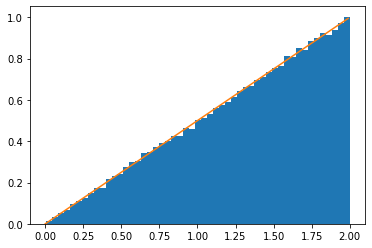

In [ ]:
nbins = 51
mpl.pyplot.hist(dat, nbins, density=True)
x = np.arange(0, 2, 0.01)
y = 0.5 * x
mpl.pyplot.plot(x, y)
mpl.pyplot.show()

Now we nest three `for` loops inside of each other, in order to analyze random walks with various numbers of steps.  The innermost loop over `step` carries out the walk, taking `Nstep` steps of random length $x$ drawn from the probability distribution $p(x)$ above, and adding these steps to the running sum `d` (for "distance").  In the middle loop over `i`, this `nStep` random walk is repeated 100,000 times, allowing its final length to be analyzed as a random variable, which we accumulate in the running sum `L`.  The outermost loop over `Nstep` simply repeats this entire procedure fo reach of the eight numbers of steps held by the array `N_list`.

To confirm that the average walk length follows our expectation `L`$\propto$`Nstep`, we can both print out and plot our results.

(If we were pressed for time, we could re-use the first $N$ steps of each 80-step walk as an $N$-step walk.  This would produce **correlated** results, but we would only need to care about those correlations if we were carrying out careful uncertainty analyses, which are beyond the scope of this module.)

N  L
10 13.333167540679773
20 26.658194112196895
30 40.00429236990038
40 53.31085558930447
50 66.66957649445796
60 79.99560186598953
70 93.32899442298724
80 106.65289724794575


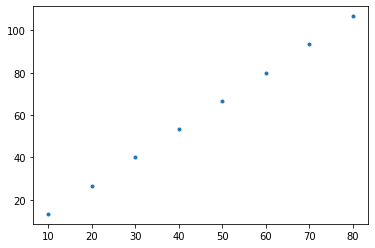

In [ ]:
N_list = [10, 20, 30, 40, 50, 60, 70, 80]
L = []
print("N  L")
for Nstep in N_list:
  L.append(0.0)
  for i in range(0, nSamples):
    d = 0.0
    for step in range(0, Nstep):
      d += 2.0 * math.sqrt(random.random())
    L[-1] += d
  L[-1] /= float(nSamples)
  print(Nstep, L[-1])

mpl.pyplot.clf()
mpl.pyplot.plot(N_list, L, linestyle='None', marker=".")
mpl.pyplot.show()

Suppose we are confident that `L` is a linear function of `Nstep`, $L = aN + b$, and just want to determine the slope $a$ and intercept $b$.  We can do this by using NumPy's `np.polyfit` function to fit these data to a polynomial.  The order of the polynomial (here `1`) is the third argument of this function.  By printing the output of this function, we can confirm our expectation that the slope is simply the mean of the single-step process, $\mu = \frac{4}{3}$, while the intercept vanishes up to our current statistical precision.

We can also plot the results of the fit along with the data points already shown above, to confirm that the fit provides a good description of these data.

a = 1.3332437605931373
b = -0.0017717712584117953


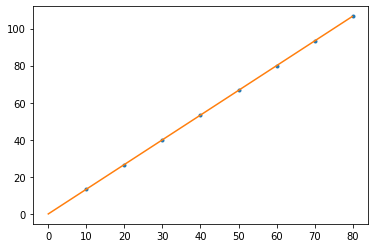

In [ ]:
output = np.polyfit(N_list, L, 1)
a=output[0]
b=output[1]
print("a =", a)
print("b =", b)

mpl.pyplot.clf()
mpl.pyplot.plot(N_list, L, linestyle='None', marker=".")
x = np.arange(0, 80, 0.1)
p = output[0] * x + output[1]
mpl.pyplot.plot(x, p)
mpl.pyplot.show()

What if we *aren't* sure that the relation between the walk length and the number of steps is linear, but we are confident that the intercept is negligible.  (After all, we can't walk very far by taking $0$ steps!)  This calls for fitting the data to a general **power law**, $L = cN^{\alpha}$, to determine both the power $\alpha$ and the constant of proportionality $c$.

There are ways to do such power-law fits directly in Python, but there is alsa a famous trick that makes this task much simpler: We take the log of both sides of the power law, and get back to a linear relation, $\log L = \alpha \log N + \log c$.  Adapting the linear fit above then confirms that $\alpha \approx 1$ and $c \approx \mu$ to very good precision.

alpha = 1.0000081134340417
c = 1.3331555349661957


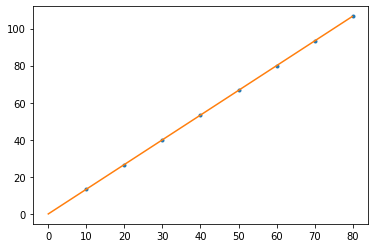

In [ ]:
logN = np.log(N_list);
logL = np.log(L);
output = np.polyfit(logN, logL, 1)
alpha = output[0]
c=np.exp(output[1])
print("alpha =", alpha)
print("c =", c)

mpl.pyplot.clf()
mpl.pyplot.plot(N_list, L, linestyle='None', marker=".")
x = np.arange(0, 80, 0.1)
p = c * x**alpha
mpl.pyplot.plot(x, p)
mpl.pyplot.show()

# Postscript
We expect the accuracy with which we reproduce the exact analytic results to improve with more data (larger `nSamples`).  Feel free to try running this notebook with larger (or smaller) `nSamples` to see whether this expectation is fulfilled.